In [1]:
from tardis import run_tardis

#model_name = 'hit_right_lte_l300_150te_dilute-blackbody_8.3Lsun'
#model_name = 'hit_5.0e-11_300_300_1.0C0.0O_right13000_lte_dilute-lte_dilute-blackbody_8.2Lsun_3.5d'
model_name = 'exp2000_5.0e-12_0.5C0.5O_right13000_lte_dilute-lte_dilute-blackbody_8.2Lsun'
#model_name = 'M2023_0.1_1.0e-10_+0_0.5C0.5O_12000_lte_dilute-lte_dilute-blackbody_8.2Lsun_3.5d'
#model_name = 'DDC_0.5C0.5O_13000_lte_dilute-lte_dilute-blackbody_8.1Lsun_3.5d'
#model_name = 'test_nlte'

sim = run_tardis("SN2024igg.yml",
                 virtual_packet_logging=True,
                 show_convergence_plots=True,
                 export_convergence_plots=True,
                 log_level="INFO")

Auto-detected Jupyter notebook environment


Auto-detected Jupyter notebook environment


Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Initializing tabulator and plotly panel extensions for widgets to work


BokehModel(combine_events=True, render_bundle={'docs_json': {'8052963b-a8f0-4250-8498-a2a6ae670407': {'version…

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    'data': [{'type': 'scatter', 'uid': '14c3ea44-6556-4604-b7b0-03980a348227', …

Embedding the final state for Jupyter environments


In [2]:
import matplotlib.pyplot as plt

spectrum = sim.spectrum_solver.spectrum_real_packets
#spectrum_virtual = sim.spectrum_solver.spectrum_virtual_packets
#spectrum_integrated = sim.spectrum_solver.spectrum_integrated

In [3]:
#sim.to_hdf('tmp/hit_right_lte_lte_8.3Lsun.hdf',name='simulation')

[10000.          9962.14385336  9924.57324335 ...   500.28516254
   500.19007223   500.09501805]
[3.68331795e-17 4.35904015e-17 3.83268762e-17 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


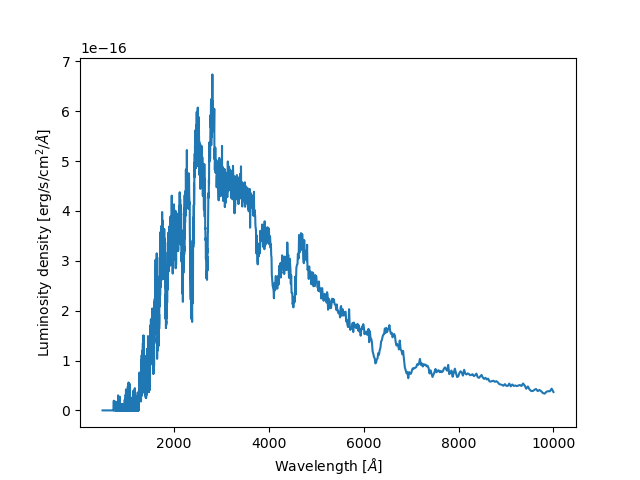

In [4]:
%matplotlib widget
import astropy.units as u
import numpy as np
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Luminosity density [erg/s/cm$^2$/$\AA$]")
d = 51.18 * u.Mpc
wave_lambda = spectrum.wavelength.value
F_lambda = (spectrum.luminosity_density_lambda / (4*np.pi*d**2)).to(u.erg/u.s/u.cm**2/u.AA).value
print(wave_lambda)
print(F_lambda)
plt.plot(wave_lambda, F_lambda)
plt.show()
np.savetxt('%s.txt'%model_name, np.array([wave_lambda[::-1], F_lambda[::-1]]).T)

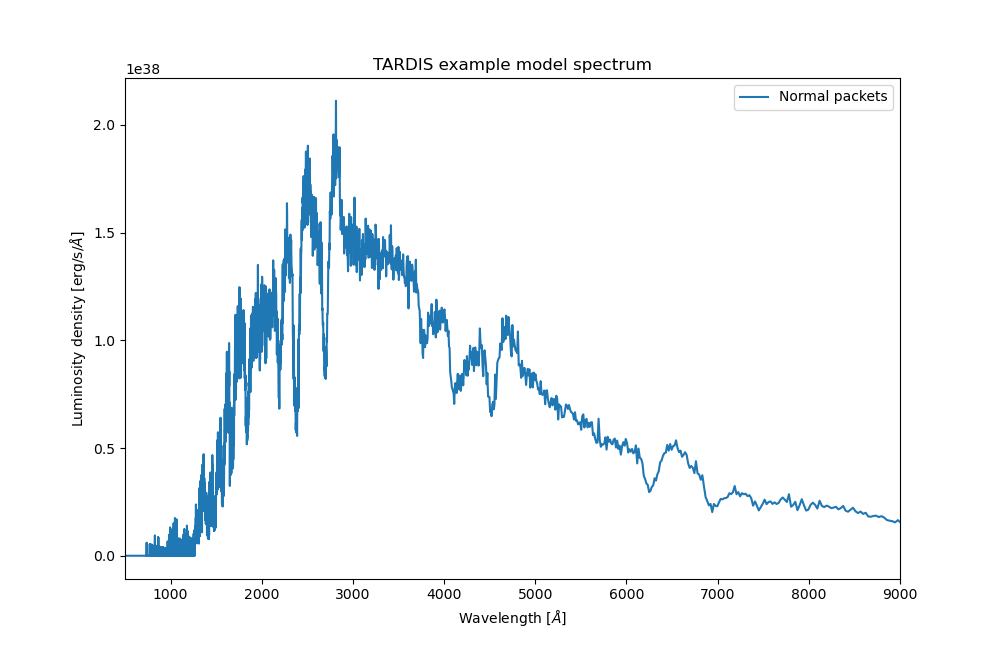

In [5]:
#%matplotlib inline
%matplotlib widget
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
#spectrum_virtual.plot(label="Virtual packets")
#spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()

In [6]:
from tardis.visualization import SDECPlotter
import astropy.units as u
import numpy as np

In [7]:
plotter = SDECPlotter.from_simulation(sim)

In [16]:
data = np.loadtxt('2024igg_2024-05-07_00-00-00_NOT_ALFOSC_None.ascii')
data[:,1] = data[:,1]*1e-17*0.3319287175855007
data[:,0] = data[:,0]/(1+0.01085)
data[:,1] = data[:,1]*(1+0.01085)

#data[:,1] = data[:,1]/0.8561543018479728

observed_spectrum_wavelength, observed_spectrum_flux, observed_spectrum_flux_err = data.T
observed_spectrum_wavelength = observed_spectrum_wavelength * u.AA
observed_spectrum_flux = observed_spectrum_flux * u.erg / (u.s * u.cm**2 * u.AA)

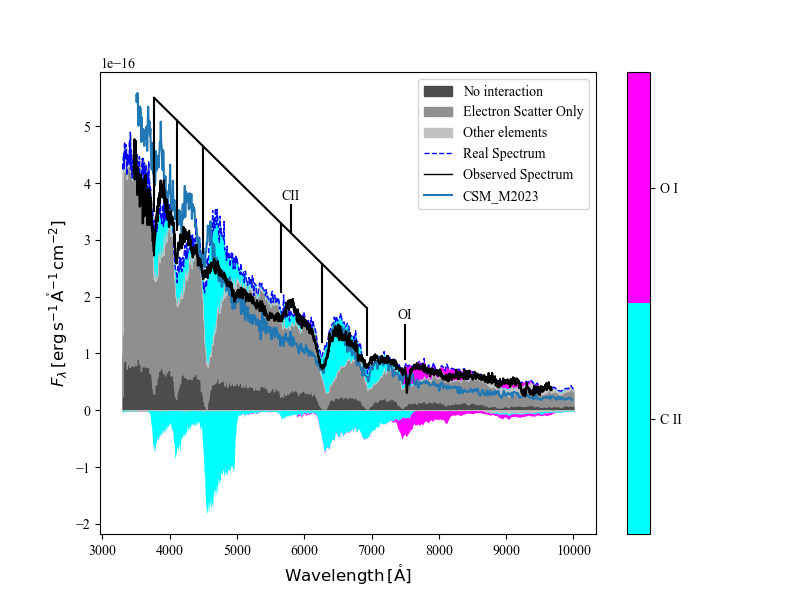

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax = plotter.generate_plot_mpl('real', species_list=['C II', 'O I', 'He I'], observed_spectrum = (observed_spectrum_wavelength, observed_spectrum_flux), distance=51.18 * u.Mpc,
                              ax=ax,packet_wvl_range=np.array([3300,10000])*u.AA, blackbody_photosphere=False, cmapname='cool')

plt.rcParams["font.family"] = 'Times New Roman'
spec_M2023 = np.loadtxt('spect_031.d')
spec_M2023[:,1] = spec_M2023[:,1]*0.0021713347070782033
mark = (spec_M2023[:, 0] > 3500)*(spec_M2023[:, 0] < 10000)
ax.plot(spec_M2023[:,0][mark], spec_M2023[:,1][mark], label='CSM_M2023')

ax.plot(data[:,0], data[:,1], c='black')

ax.plot([3770, 3770], [3.5e-16,5.5e-16], color='black')
ax.plot([4103, 4103], [3.17e-16,5.11e-16], color='black')
ax.plot([4503, 4503], [2.77e-16,4.64e-16], color='black')
ax.plot([5650, 5650], [2.087e-16,3.3e-16], color='black')
ax.plot([6270, 6270], [1.2e-16,2.57e-16], color='black')
ax.plot([6930, 6930], [9.8e-17,1.8e-16], color='black')
ax.plot([3770, 6930], [5.5e-16,1.8e-16], color='black')
ax.plot([5800, 5800], [3.12e-16,3.62e-16], color='black')
ax.text(5800, 3.65e-16, 'CII', va='bottom', ha='center')

ax.plot([7500, 7500], [0.9e-16, 1.5e-16], c='black')
ax.text(7500, 1.55e-16, 'OI', va='bottom', ha='center')

ax.legend()

fig.savefig(model_name + '.pdf', bbox_inches='tight')
#species_list=['C II', 'He I', 'He II']


In [10]:
#from tardis.visualization.tools.liv_plot import LIVPlotter

#plotter = LIVPlotter.from_simulation(sim)

In [11]:
#plotter.generate_plot_mpl(packets_mode="real", species_list=['C II'])

In [12]:
from tardis.visualization import (
    shell_info_from_simulation,
    shell_info_from_hdf,
    LineInfoWidget,
    GrotrianWidget,
)

In [13]:
#shell_info_widget = shell_info_from_simulation(sim)
#shell_info_widget.display()

In [14]:
#energy_level_widget = GrotrianWidget.from_simulation(sim)
#energy_level_widget.display()

In [15]:
#line_info_widget = LineInfoWidget.from_simulation(sim)
#line_info_widget.display()

BokehModel(combine_events=True, render_bundle={'docs_json': {'26002bd3-eccd-49e7-912f-5485eae07cc8': {'version…